In [58]:
import spacy
spacy.load('en_core_web_sm')
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
import webbrowser
from pathlib import Path
%matplotlib inline

In [59]:
# Load the dataset
data = pd.read_csv("../data/processed/lyrics_processed.csv")

In [60]:
# 1. Basic Information
profile = ydata_profiling.ProfileReport(data, title="Lyrics Dataset Profiling Report")
profile.to_file("../reports/eda_report/data_exploration_report.html")
_ = webbrowser.open(str(Path("../reports/eda_report/data_exploration_report.html").resolve()))

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 78.98it/s]


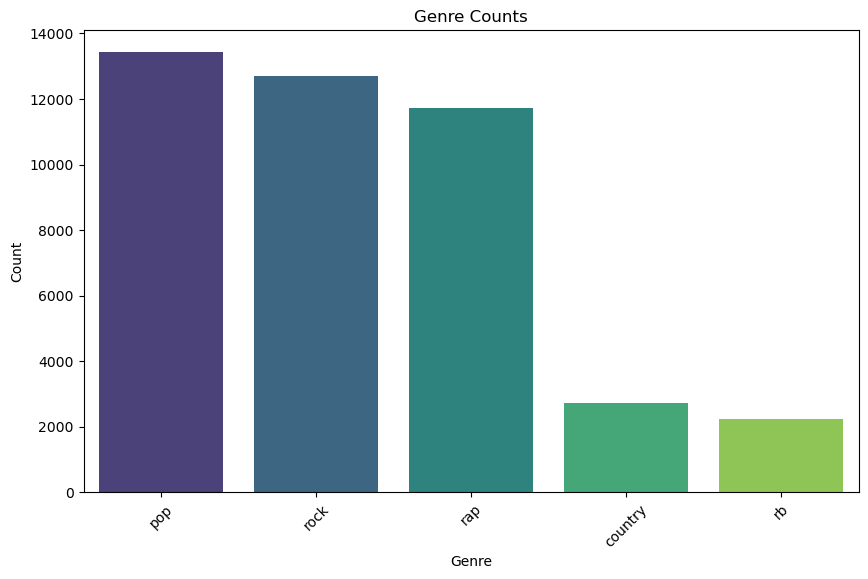

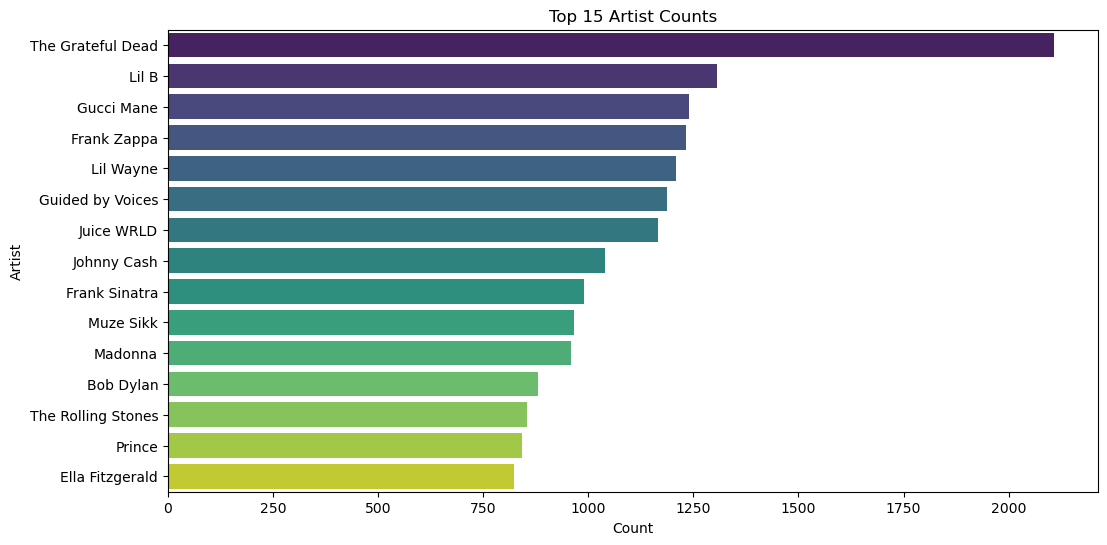

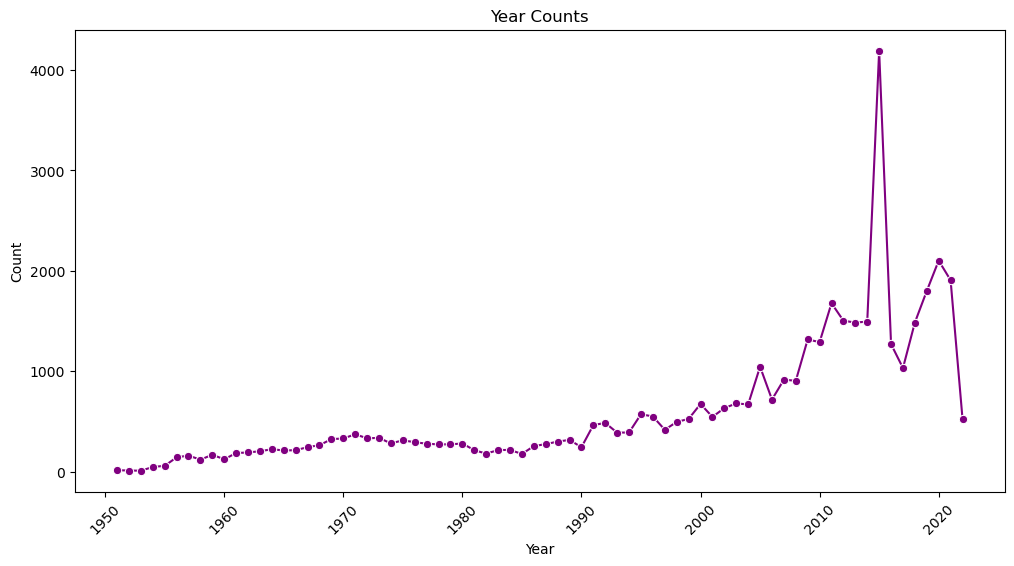

In [61]:
# 2: In-depth analysis of each categorical column
# Genre analysis
genre_counts = data['genre'].value_counts()

# Plotting genre counts
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Genre Counts')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('../reports/figures/genre-counts.png', bbox_inches='tight')
plt.show();



# Artist analysis
artist_counts = data['artist'].value_counts().nlargest(15)

# Plotting artist counts
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.values, y=artist_counts.index, palette='viridis')
plt.title('Top 15 Artist Counts')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.savefig('../reports/figures/top-15-artists.png', bbox_inches='tight')
plt.show();



# Year analysis
year_counts = data['year'].value_counts().sort_index()

# Plotting year counts
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple')
plt.title('Year Counts')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('../reports/figures/year-counts.png', bbox_inches='tight')
plt.show();

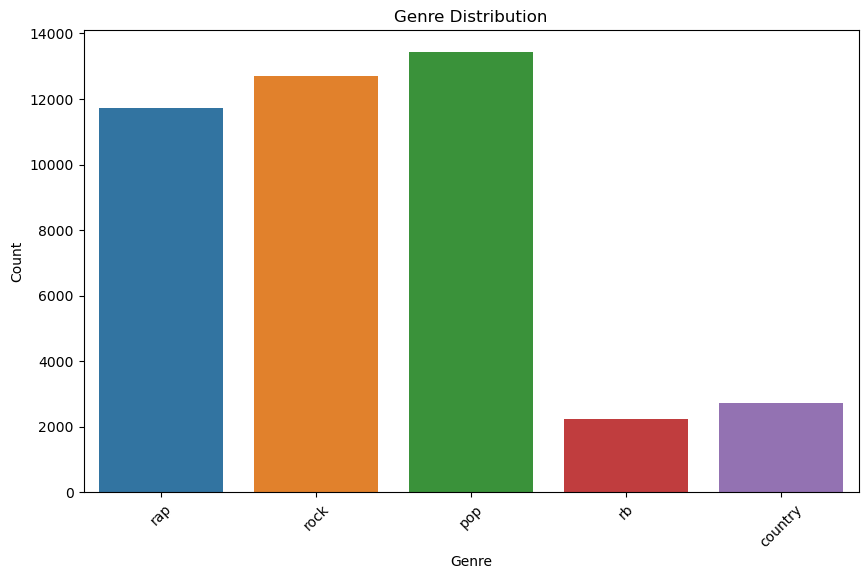

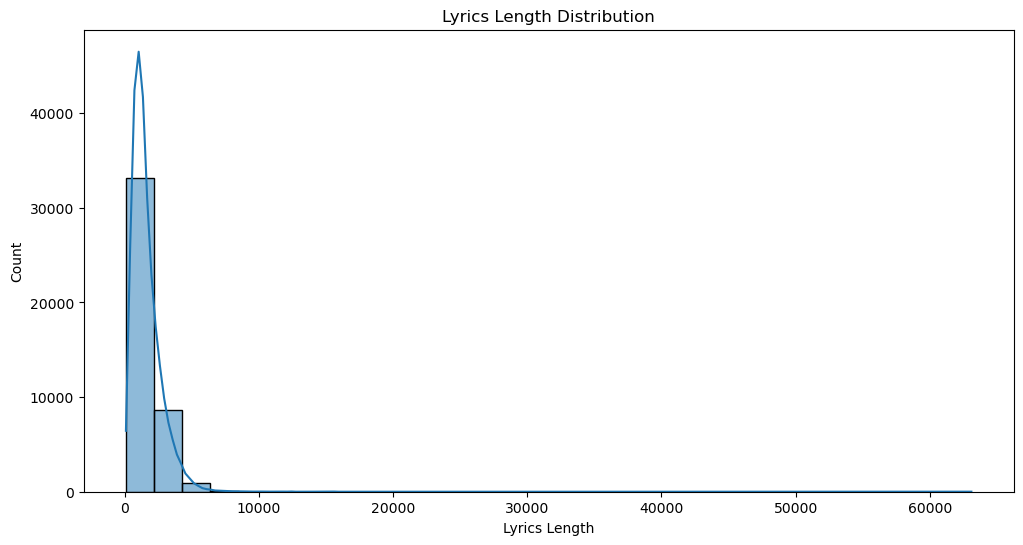

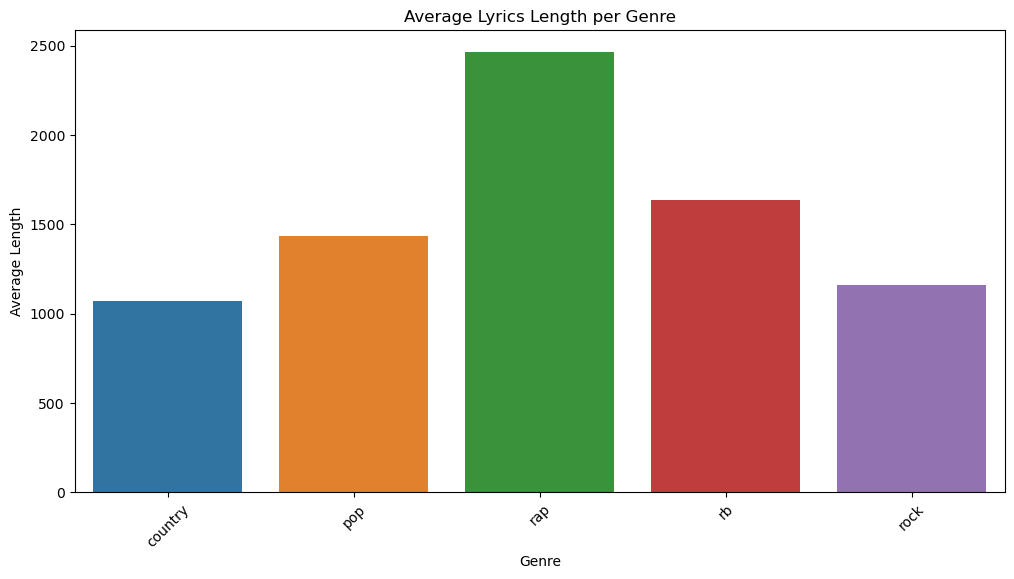

In [62]:
# 3: Visualizations
# Genre distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=data)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('../reports/figures/genre_distribution.png', bbox_inches='tight')
plt.show();



# Lyrics length distribution
len_data = data.copy()
len_data['lyrics_length'] = len_data['lyrics'].apply(lambda x: len(x))
plt.figure(figsize=(12, 6))
sns.histplot(data=len_data, x='lyrics_length', bins=30, kde=True)
plt.title('Lyrics Length Distribution')
plt.xlabel('Lyrics Length')
plt.ylabel('Count')
plt.savefig('../reports/figures/lyrics_length_distribution.png', bbox_inches='tight')
plt.show();



# Average lyrics length per genre
genre_avg_length = len_data.groupby('genre')['lyrics_length'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_length.index, y=genre_avg_length.values)
plt.title('Average Lyrics Length per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Length')
plt.xticks(rotation=45)
plt.savefig('../reports/figures/avg_lyrics_length_per_genre.png', bbox_inches='tight')
plt.show();

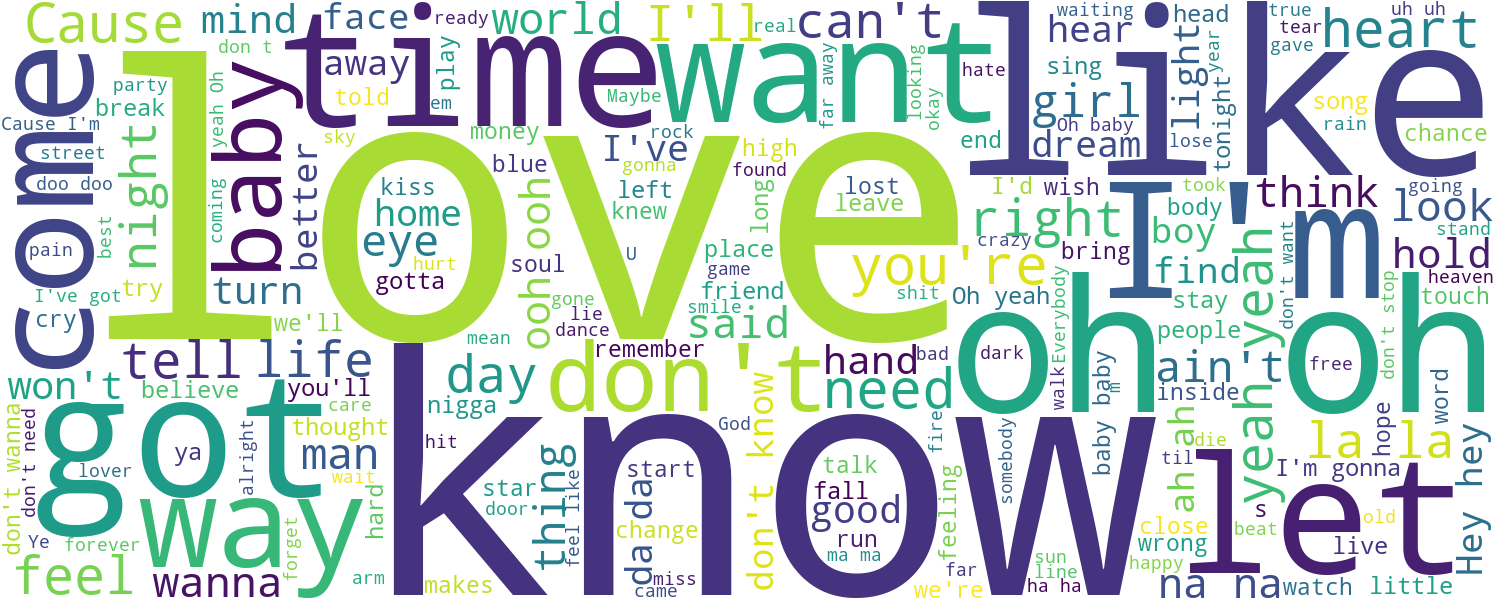

In [63]:
# 4: Wordclouds

# Pop wordcloud
wc = WordCloud(background_color="white", width=1500, height=600, stopwords=spacy.lang.en.stop_words.STOP_WORDS)
pop_wc = wc.generate(" ".join(data[data["genre"] == "pop"]["lyrics"])).to_image()
pop_wc.save("../reports/figures/pop_wordcloud.png")
pop_wc

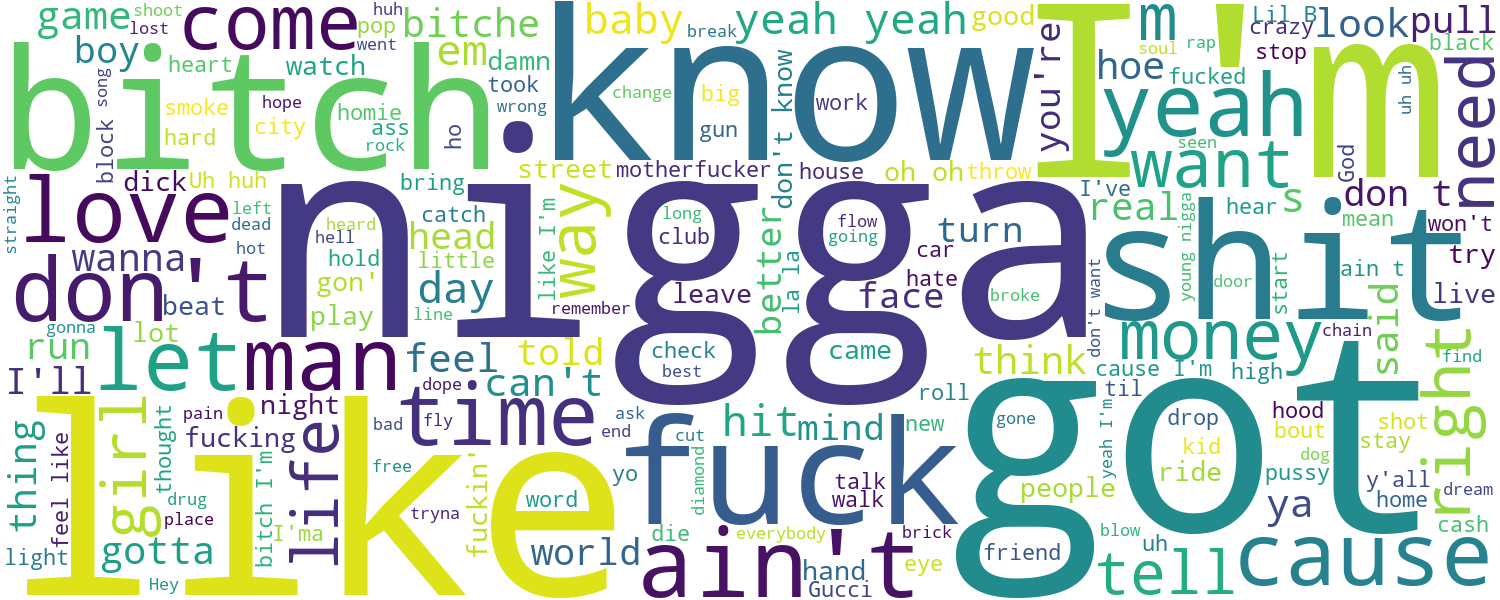

In [64]:
# Rap wordcloud
wc = WordCloud(background_color="white", width=1500, height=600, stopwords=spacy.lang.en.stop_words.STOP_WORDS)
rap_wc = wc.generate(" ".join(data[data["genre"] == "rap"]["lyrics"])).to_image()
rap_wc.save("../reports/figures/rap_wordcloud.png")
rap_wc

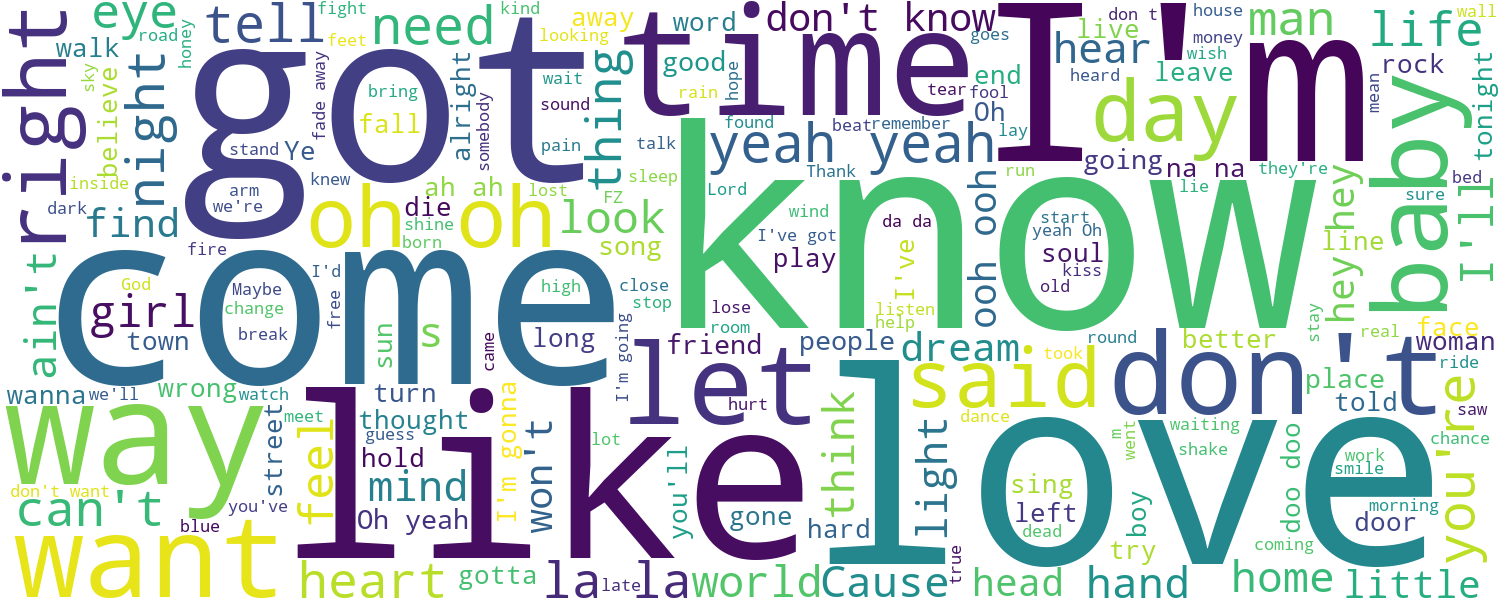

In [65]:
# Rock wordcloud
wc = WordCloud(background_color="white", width=1500, height=600, stopwords=spacy.lang.en.stop_words.STOP_WORDS)
rock_wc = wc.generate(" ".join(data[data["genre"] == "rock"]["lyrics"])).to_image()
rock_wc.save("../reports/figures/rock_wordcloud.png")
rock_wc